# PIMA Indian Diabetes  Onset Prediction
This Jupyter Notebook presents an end-end project for classifiying whether a PIMA Indian ethnic community has diabetes or not using some commonly know ML tools
We are going to take below approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> PIMA Indians originally native from Central and South Arizona is an ethnic community which now stays in Central.
These people because of surrounding conditions are highly susceptible to Diabetes
## 2. Data
> > The original data came from UCI machine learning repository.You can also get the data from Kaggle.This dataset is also available in data.world

## 3. Evaluation
> Since its a critical measurement,we are targeting 90-95% accuracy for making predictions

## 4. Features
>This is the source of information from where you get the features

#### Create Data Dictionary
* preg = Number of times pregnant

* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* pres = Diastolic blood pressure (mm Hg)

* skin = Triceps skin fold thickness (mm)

* test = 2-Hour serum insulin (mu U/ml)

* mass = Body mass index (weight in kg/(height in m)^2)

* pedi = Diabetes pedigree function

* age = Age (years)

* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [66]:
# Preparing the tools for Machine Learning Problem
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline


## Load Data

In [67]:
df=pd.read_csv('diabetes.csv')

## Basic Data checking and EDA

In [68]:
## Getting the feel of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [69]:
df[df=='?'].count()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [70]:
## We can see that all the columns are numerical and there are no missing values

In [71]:
## Checking first few rows of data
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [72]:
## Checking last few rows of data
df.tail()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True
767,1,93,70,31,0,30.4,0.315,23,False


### Lets split the data into features and target
* Features-pregnancies to age 
* target-outcome



In [73]:
X=df.drop('outcome',axis=1)
y=df['outcome']

Lets look at the shape

In [74]:
print(X.shape,y.shape)

(768, 8) (768,)


Lets first focus on target variable and encode the values with integers

In [75]:
le=LabelEncoder()
transformed_y=le.fit_transform(y)

In [76]:
transformed_y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [77]:
## Lets convert it to Series

In [78]:
y=pd.Series(transformed_y)

In [79]:
# Some additional verification checks
# We found that the shape is same and the data is indeed converted to Series
print(y.shape)
print(type(y))
print(y[:5])

(768,)
<class 'pandas.core.series.Series'>
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [80]:
## Lets focus our attention towards X
## Lets look at some suumary statistics
X.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [81]:
## We can see the prgenancies vary from 0 to 17.
## This is quite strange

## Lets visualise the data w.rt target variable

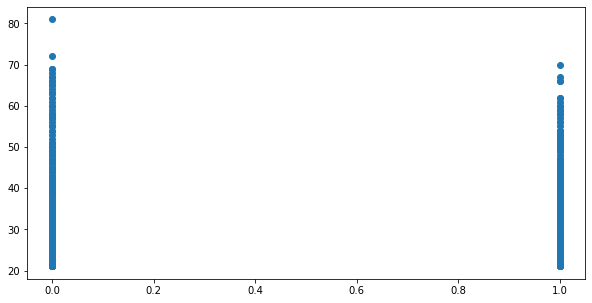

In [82]:
## Bar plot of age and outcome
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df['outcome'],df['age'])

<BarContainer object of 768 artists>

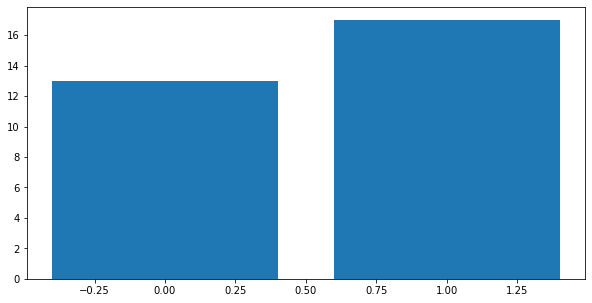

In [83]:
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(df['outcome'],df['pregnancies'])

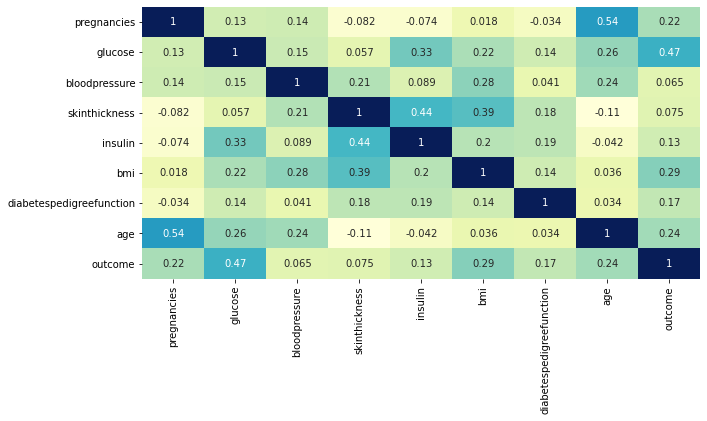

In [84]:
## Lets see the correlation of features w.rt target variable
corr_matrix=df.corr()
def plot_correlation_matrix(corr_matrix):
    fig,ax=plt.subplots(figsize=(10,5))
    ax=sns.heatmap(corr_matrix,cbar=False,cmap='YlGnBu',annot=True)
plot_correlation_matrix(corr_matrix)  

## We can see that pregnancies,glucose,bmi,insulin,diabetes pedigree function and age are vital parameters to predict whether a patient is diabetic or not

### Feature Selection

Lets select only the vital columns which have high correlation

Here we will select columns which have correlation > 0.1


In [85]:
cols=['pregnancies','glucose','insulin','bmi','diabetespedigreefunction','age']
X_final=X[cols]

In [86]:
X_final

,pregnancies,glucose,insulin,bmi,diabetespedigreefunction,age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


Since all the columns are on different scale,we will put all the columns on common scale by scaling the data

In [87]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X_final)

In [88]:
X_scaled

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

In [89]:
X_scaled_df=pd.DataFrame(X_scaled,columns=cols)

In [90]:
X_scaled_df

,pregnancies,glucose,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.848324,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...
763,1.827813,-0.622642,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.692891,-0.240205,-0.371101,1.170732


## 5. Modelling

In [91]:
## First we split the data into training set and test set using a ratio of 80% training and 20% test

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_df,y,train_size=0.8,stratify=y,random_state=42)

In [93]:
## Lets get the shapes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 6)
(154, 6)
(614,)
(154,)


We will use below classification models for training the data.
1. Logistic Regression
2. RandomForest Classifier
3. K Nearest Neighbours
4. SVC
5. XGBoost

In [94]:
## We will create a dictionary to add some models
models_set={'lr':LogisticRegression(),'RF':RandomForestClassifier(),'KNN':KNeighborsClassifier(),'SVC':SVC(),'XGBOOST':XGBClassifier()}

In [95]:
## Lets evaluate the above models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    X_train-Training data without labels
    X_test-Holdout/Validation data without labels
    y_train-Training Data with labels only
    y_test-Testing Data with labels only
    """
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores    

In [96]:
models_score=fit_and_score(models=models_set,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

## Model Comparision


In [97]:
model_compare=pd.DataFrame(models_score,index=['accuracy'])

In [98]:
model_compare

,lr,RF,KNN,SVC,XGBOOST
accuracy,0.714286,0.753247,0.720779,0.733766,0.720779


<AxesSubplot:>

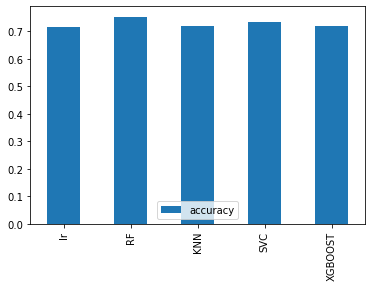

In [99]:
model_compare.T.plot(kind='bar')

We have got baseline model with first set of accuracy scores.But these scores are usually not the ones which you are looking for.

Let's look at the following
* Hyperparameter Tuning
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification score
* ROC curve
* Area under the curve(AUC)

## HyperParameter Tuning(By hand)


In [100]:
train_scores=[]
test_scores=[]
## Lets first instantiate the model
rf=RandomForestClassifier()

np.random.seed(42)
n_estimators=np.arange(1,30)
for i in n_estimators:
    rf.set_params(n_estimators=i)
    rf.fit(X_train,y_train)
    # Getting the scores of training model
    train_scores.append(rf.score(X_train,y_train))
    #Getting the scores of testing model
    test_scores.append(rf.score(X_test,y_test))
        
    
    
    

In [101]:
print(train_scores)

[0.8892508143322475, 0.8859934853420195, 0.9462540716612378, 0.9364820846905537, 0.9690553745928339, 0.9625407166123778, 0.9723127035830619, 0.9853420195439739, 0.988599348534202, 0.9820846905537459, 0.988599348534202, 0.9804560260586319, 0.9837133550488599, 0.9869706840390879, 0.99185667752443, 0.99185667752443, 0.990228013029316, 0.998371335504886, 0.996742671009772, 1.0, 0.995114006514658, 1.0, 0.995114006514658, 0.998371335504886, 1.0, 0.998371335504886, 1.0, 1.0, 0.998371335504886]


In [102]:
print(test_scores)

[0.6818181818181818, 0.6623376623376623, 0.7272727272727273, 0.7467532467532467, 0.7337662337662337, 0.7207792207792207, 0.7142857142857143, 0.7272727272727273, 0.7402597402597403, 0.7077922077922078, 0.7077922077922078, 0.7207792207792207, 0.7662337662337663, 0.7142857142857143, 0.7402597402597403, 0.7142857142857143, 0.7467532467532467, 0.7207792207792207, 0.7402597402597403, 0.7142857142857143, 0.7207792207792207, 0.7402597402597403, 0.7272727272727273, 0.7207792207792207, 0.7727272727272727, 0.7467532467532467, 0.7467532467532467, 0.7337662337662337, 0.7532467532467533]


The max testing score is 77.27%


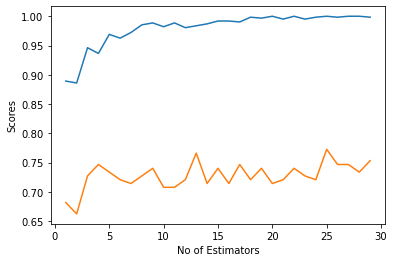

In [103]:
plt.plot(n_estimators,train_scores,label="Training Score")
plt.plot(n_estimators,test_scores,label="Test Score")
plt.xlabel("No of Estimators")
plt.ylabel("Scores")
print(f"The max testing score is {max(test_scores)*100:.2f}%")


In [104]:
# Lets use XGBoost for hyperparameter tuning
train_scores=[]
test_scores=[]
## Lets first instantiate the model
xgb=XGBClassifier()

np.random.seed(42)
n_estimators=np.arange(1,30)
for i in n_estimators:
    xgb.set_params(n_estimators=i)
    xgb.fit(X_train,y_train)
    # Getting the scores of training model
    train_scores.append(xgb.score(X_train,y_train))
    #Getting the scores of testing model
    test_scores.append(xgb.score(X_test,y_test))

In [105]:
train_scores

[0.8355048859934854,
 0.8664495114006515,
 0.8827361563517915,
 0.9006514657980456,
 0.9006514657980456,
 0.9185667752442996,
 0.9120521172638436,
 0.9169381107491856,
 0.9267100977198697,
 0.9381107491856677,
 0.9446254071661238,
 0.9527687296416938,
 0.9560260586319218,
 0.9576547231270358,
 0.9609120521172638,
 0.9674267100977199,
 0.9657980456026058,
 0.9706840390879479,
 0.9723127035830619,
 0.9723127035830619,
 0.9771986970684039,
 0.9788273615635179,
 0.9804560260586319,
 0.9804560260586319,
 0.990228013029316,
 0.99185667752443,
 0.993485342019544,
 0.993485342019544,
 0.996742671009772]

In [106]:
test_scores

[0.7402597402597403,
 0.7272727272727273,
 0.7402597402597403,
 0.7272727272727273,
 0.7272727272727273,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7532467532467533,
 0.7467532467532467,
 0.7532467532467533,
 0.7467532467532467,
 0.7532467532467533,
 0.7467532467532467,
 0.7532467532467533,
 0.7402597402597403,
 0.7662337662337663,
 0.7532467532467533,
 0.7467532467532467,
 0.7597402597402597,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7532467532467533,
 0.7532467532467533,
 0.7597402597402597,
 0.7402597402597403,
 0.7337662337662337,
 0.7402597402597403]

The max testing score is 76.62%


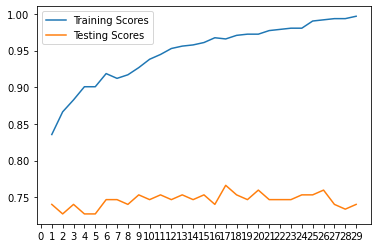

In [107]:
plt.plot(n_estimators,train_scores,label="Training Scores")
plt.plot(n_estimators,test_scores,label="Testing Scores")
plt.xticks(np.arange(30))
plt.legend()
print(f"The max testing score is {max(test_scores)*100:.2f}%")


In [108]:
# We will finally use SVC and then evaluate the model

In [109]:
# Lets use XGBoost for hyperparameter tuning
train_scores=[]
test_scores=[]
## Lets first instantiate the model
svc=SVC()
np.random.seed(42)
C=np.arange(1,30)
for i in n_estimators:
    svc.set_params(C=i)
    svc.fit(X_train,y_train)
    # Getting the scores of training model
    train_scores.append(svc.score(X_train,y_train))
    #Getting the scores of testing model
    test_scores.append(svc.score(X_test,y_test))

In [110]:
train_scores

[0.8355048859934854,
 0.8452768729641694,
 0.8501628664495114,
 0.8501628664495114,
 0.8501628664495114,
 0.8534201954397395,
 0.8550488599348535,
 0.8566775244299675,
 0.8566775244299675,
 0.8599348534201955,
 0.8583061889250815,
 0.8583061889250815,
 0.8680781758957655,
 0.8680781758957655,
 0.8664495114006515,
 0.8664495114006515,
 0.8664495114006515,
 0.8697068403908795,
 0.8729641693811075,
 0.8729641693811075,
 0.8778501628664495,
 0.8778501628664495,
 0.8794788273615635,
 0.8811074918566775,
 0.8811074918566775,
 0.8843648208469055,
 0.8843648208469055,
 0.8876221498371335,
 0.8892508143322475]

In [111]:
test_scores

[0.7337662337662337,
 0.7597402597402597,
 0.7337662337662337,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7337662337662337,
 0.7402597402597403,
 0.7402597402597403,
 0.7272727272727273,
 0.7337662337662337,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337662337,
 0.7402597402597403,
 0.7467532467532467,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7207792207792207,
 0.7207792207792207,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

In [112]:
print(f"The max value of test score is  {max(test_scores)*100:.2f}%")

The max value of test score is  75.97%


In [113]:
#Well the model scoring is quite close
# Based on max score  we select K Nearest Neighbours as our final model


In [121]:
# We will use Grid Search CV to tune the best hyperparameter for Random Forest
rf_grid_cv={'n_estimators':[1, 2, 4, 8, 16, 32],'criterion':['gini','entropy'],'max_depth':np.linspace(1,4,10)}
rs_rf=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid_cv,cv=5,verbose=True)


In [122]:
rs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1.        , 1.33333333, 1.66666667, 2.        , 2.33333333,
       2.66666667, 3.        , 3.33333333, 3.66666667, 4.        ]),
                         'n_estimators': [1, 2, 4, 8, 16, 32]},
             verbose=True)

In [123]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   17.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1.        , 1.33333333, 1.66666667, 2.        , 2.33333333,
       2.66666667, 3.        , 3.33333333, 3.66666667, 4.        ]),
                         'n_estimators': [1, 2, 4, 8, 16, 32]},
             verbose=True)

In [124]:
rs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 3.333333333333333, 'n_estimators': 16}

In [130]:
rf_final=RandomForestClassifier(n_estimators=16,max_depth=3.33,criterion='entropy')

In [131]:
rf_final.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3.33, n_estimators=16)

In [137]:
rf_final.score(X_test,y_test)

0.7207792207792207